## Analysis2: Identify changing patterns of conversations during 2 phases - Peak(2000) and Downfall(2001)

#### Step 1: Import modules

In [1]:
from email.parser import Parser
import glob
import os
import datetime
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#### Step 2: Identify directories

In [2]:
# Path to the Enron dataset
path_to_maildir = 'C:/Users/parit/midterm/data/enron/maildir'

In [3]:
# Path to primary convicts mailboxes (Andrew Fastow's mailbox is not present in the dataset)
path_to_kenneth_lay = path_to_maildir + '/lay-k'
path_to_jeff_skilling = path_to_maildir + '/skilling-j'


#### Step 3: Define processing logic


In [4]:
# Function to recursively read mails from folders and sub-folders
def processEmails(path):
    peak_mail_words = []
    dwnfall_mail_words = []
    inner_peak = []
    inner_dwnfall = []
    pathContent = glob.glob(path + '/*')    
    for pathName in pathContent:
        if os.path.isdir(pathName):    
            (inner_peak, inner_dwnfall) = processEmails(pathName)
            peak_mail_words = peak_mail_words + inner_peak
            dwnfall_mail_words = dwnfall_mail_words + inner_dwnfall
        else:
            try:
                with open(pathName, 'r') as filename:
                    email = Parser().parsestr(filename.read())                    
                    mail_date = email['date']
                    mail_content = email.get_payload().split()                    
                    mail_date = datetime.datetime.strptime(mail_date[:-6],"%a, %d %b %Y %H:%M:%S %z")
                    if mail_date.year in range(1997,2001):                        
                        peak_mail_words = peak_mail_words + mail_content
                    elif mail_date.year == 2001:
                        dwnfall_mail_words = dwnfall_mail_words + mail_content
            except:
                print('File open error due to foreign characters:', pathName)
    return (peak_mail_words, dwnfall_mail_words)

In [5]:
def drawWordCloud(text):
    other_stopwords = list(STOPWORDS) + ['Enron', 'will', 'new', 'Please', 'time', 'Lay', 'Thank', 'Jeff']
    wc = WordCloud(background_color="white", max_words=2000, stopwords=set(other_stopwords)).generate(' '.join(text))
    plt.imshow(wc)
    plt.axis("off")
    plt.show()


#### Step 4: Invoke email processing for Kenneth Lay

The word cloud for Kenneth Lay in first phase:


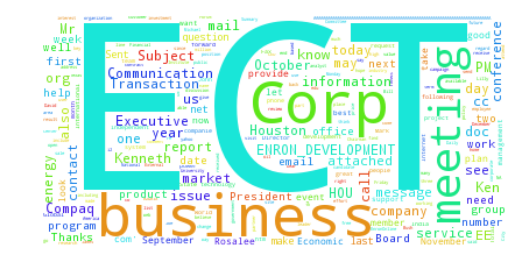

The word cloud for Kenneth Lay in second phase:


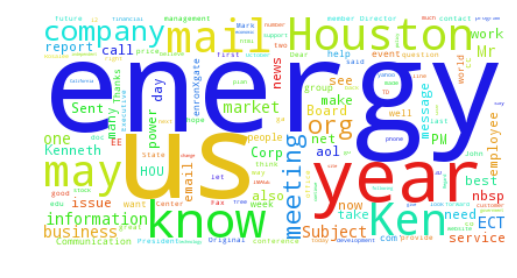

In [6]:
# Invoke processEmails() for Kenneth Lay
(before, after) = processEmails(path_to_kenneth_lay)
print('The word cloud for Kenneth Lay in first phase:')

drawWordCloud(before)

print('The word cloud for Kenneth Lay in second phase:')

drawWordCloud(after)

#### Step 5: Invoke email processing for Kenneth Lay

The word cloud for Jeff Skilling in first phase:


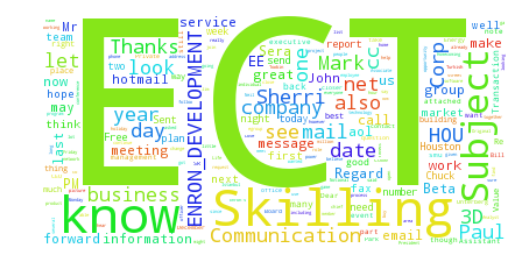

The word cloud for Jeff Skilling in second phase:


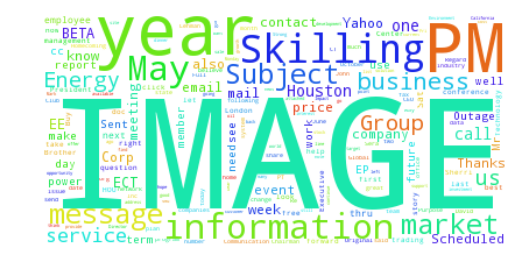

In [7]:
# Invoke processEmails() for Jeff Skilling
(before, after) = processEmails(path_to_jeff_skilling)
print('The word cloud for Jeff Skilling in first phase:')

drawWordCloud(before)

print('The word cloud for Jeff Skilling in second phase:')

drawWordCloud(after)

### Conclusion for Analysis 2: 

> While there was a focus on Business Development to counter the Economic Issues during first phase, but during the second phase the focus was more on financial trading of Enron stocks which hint at Insider Trading.